## Naive Bayes - Text Classification
## Movie Reviews Classification
  **Dataset contains Movie Reviews and labelled as either Positive Review or Negative Review**

### Task:
To create a Machine Learning Model that can predict whether a given review is Negative or Positive.

### Steps followed:
1. Dealing with NULL values and Rows having blank spaces
2. Text Preprocessing
3. Using **Naive Bayes** Machine Learning Algorithms 
4. Evaluating Metrics of those models

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/UNZIP_FOR_NOTEBOOKS_FINAL (1)/DATA/moviereviews.csv')

In [5]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


#### Checking for Null values

In [6]:
df.isnull().sum()

label      0
review    35
dtype: int64

There are 35 Null values in Review Column. \
Let's have a look on those records.

In [7]:
df[df['review'].isnull()]

,label,review
140,pos,NaN
208,pos,NaN
270,neg,NaN
334,neg,NaN
448,neg,NaN
522,neg,NaN
606,pos,NaN
696,neg,NaN
728,pos,NaN
738,neg,NaN


In [8]:
# DROPPING THOSE RECORDS
df = df.dropna(axis=0)

In [9]:
df.shape

(1965, 2)

### Exploring Review Column

In [10]:
df['review'].sample(100)

1621    weir is well-respected in hollywood for turnin...
641     the last of vampire-films offers plenty of blo...
566     the catch phrase for disney's rocket man is on...
913     in the past , tim burton has taken cinema by s...
451     mike myers , you certainly did throw us a ? fr...
                              ...                        
133     when a someone journeys to the theater to see ...
788     when people are talking about good old times ,...
1129    synopsis : sonny koufax ( adam sandler ) is a ...
1565    everybody in this film's thinking of alicia . ...
1830    the cartoon is way better . \r\nthat's the bot...
Name: review, Length: 100, dtype: object

**Checking whether Review Column contains any Blank spaces or not**

In [11]:
sum(df['review'].str.isspace())

27

In [12]:
blank_rows = df[df['review'].str.isspace()==True]
blank_rows

,label,review
57,neg,
71,pos,
147,pos,
151,pos,
283,pos,
307,pos,
313,neg,
323,pos,
343,pos,
351,neg,


**Inference :** In above records,we can see the label as pos/neg but there is no Review. \
**Dropping those records.**


In [13]:
blank_rows_index = blank_rows.index
blank_rows_index

Int64Index([  57,   71,  147,  151,  283,  307,  313,  323,  343,  351,  427,
             501,  633,  675,  815,  851,  977, 1079, 1299, 1455, 1493, 1525,
            1531, 1763, 1851, 1905, 1993],
           dtype='int64')

In [14]:
df = df.drop(index=blank_rows_index)

In [15]:
df.shape

(1938, 2)

### Checking the Value Counts for Label Column

In [16]:
df['label'].value_counts()

neg    969
pos    969
Name: label, dtype: int64

**Dataset is balanced.**

## Text Preprocessing
* **Removing HTML Tags**
* **Removing Special Characters**
* **Converting each letter to lower case**
* **Removing Stop Words**
* **Stemming**

### Removing HTML Tags

In [17]:
import re

In [18]:
def remove_html(text):
  clean = re.compile('<.*?>')
  return re.sub(clean,'',text)

In [19]:
df['review'] = df['review'].apply(remove_html)

### Removing Special Characters

In [20]:
def remove_special(text):
    modified_text = ''
    for char in text:
      if char.isalnum():
        modified_text = modified_text + char
      else:
          modified_text = modified_text + ' '
    return modified_text      

In [21]:
df['review'] = df['review'].apply(remove_special)

In [22]:
df['review']

0       how do films like mouse hunt get into theatres...
1       some talented actresses are blessed with a dem...
2       this has been an extraordinary year for austra...
3       according to hollywood movies made in last few...
4       my first press screening of 1998 and already i...
                              ...                        
1995    i like movies with albert brooks   and i reall...
1996    it might surprise some to know that joel and e...
1997    the verdict   spine chilling drama from horror...
1998    i want to correct what i wrote in a former ret...
1999    a couple of months ago   when i first download...
Name: review, Length: 1938, dtype: object

### Converting each letter into Lower Case

In [23]:
df['review'] = df['review'].str.lower()

### Removing Stop Words

#### **Natural Language Toolkit**

In [24]:
import nltk

In [25]:
from nltk.corpus import stopwords

In [26]:
# DOWNLOADING STOPWORDS FROM NLTK LIBRARY
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
# PRINTING ENGLISH STOPWORDS
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [28]:
def remove_stopwords(text):
  l = []
  for word in text.split():
    if word not in stopwords.words('english'):
      l.append(word)
  x = l[:]
  l.clear()
  return x    

In [29]:
df['review'] = df['review'].apply(remove_stopwords)

In [30]:
df['review']

0       [films, like, mouse, hunt, get, theatres, law,...
1       [talented, actresses, blessed, demonstrated, w...
2       [extraordinary, year, australian, films, shine...
3       [according, hollywood, movies, made, last, dec...
4       [first, press, screening, 1998, already, gotte...
                              ...                        
1995    [like, movies, albert, brooks, really, like, m...
1996    [might, surprise, know, joel, ethan, coen, bro...
1997    [verdict, spine, chilling, drama, horror, maes...
1998    [want, correct, wrote, former, retrospective, ...
1999    [couple, months, ago, first, downloaded, face,...
Name: review, Length: 1938, dtype: object

### Stemming

In [31]:
from nltk.stem import SnowballStemmer

In [32]:
snowball_stemmer = SnowballStemmer(language='english')

In [33]:
def stemmer(text_list):
  x = []
  for word in text_list:
    x.append(snowball_stemmer.stem(word))
  y = x[:]
  x.clear()
  return y  

In [34]:
df['review'] = df['review'].apply(stemmer)

In [35]:
df['review']

0       [film, like, mous, hunt, get, theatr, law, som...
1       [talent, actress, bless, demonstr, wide, act, ...
2       [extraordinari, year, australian, film, shine,...
3       [accord, hollywood, movi, made, last, decad, l...
4       [first, press, screen, 1998, alreadi, gotten, ...
                              ...                        
1995    [like, movi, albert, brook, realli, like, movi...
1996    [might, surpris, know, joel, ethan, coen, brou...
1997    [verdict, spine, chill, drama, horror, maestro...
1998    [want, correct, wrote, former, retrospect, dav...
1999    [coupl, month, ago, first, download, face, tra...
Name: review, Length: 1938, dtype: object

#### Joining the list of words in review column

In [36]:
def join_words(words_list):
  return ' '.join(words_list)

In [37]:
df['review'] = df['review'].apply(join_words)

In [38]:
df['review']

0       film like mous hunt get theatr law someth diab...
1       talent actress bless demonstr wide act rang ot...
2       extraordinari year australian film shine scoop...
3       accord hollywood movi made last decad life sma...
4       first press screen 1998 alreadi gotten prime c...
                              ...                        
1995    like movi albert brook realli like movi direct...
1996    might surpris know joel ethan coen brought una...
1997    verdict spine chill drama horror maestro steph...
1998    want correct wrote former retrospect david lea...
1999    coupl month ago first download face trailer ne...
Name: review, Length: 1938, dtype: object

In [39]:
X = df['review']
y = df['label']

## Count Vectorizing
**Count Vectorizer is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.**

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

**Getting top 20 words used in positive reviews**

In [41]:
count_vectorizer = CountVectorizer()
sparse_matrix_pos_label = count_vectorizer.fit_transform(df[df['label']=='pos']['review'])
pos_freqs = zip(count_vectorizer.get_feature_names_out(),
                sparse_matrix_pos_label.sum(axis=0).tolist()[0])         
print('Top 20 words used in Positive Reviews')
print(sorted(pos_freqs,key=lambda x: -x[1])[:20])

Top 20 words used in Positive Reviews
[('film', 5931), ('movi', 2996), ('one', 2986), ('charact', 1996), ('like', 1940), ('make', 1626), ('time', 1530), ('get', 1448), ('stori', 1295), ('scene', 1279), ('good', 1226), ('see', 1184), ('play', 1182), ('even', 1159), ('also', 1151), ('well', 1084), ('life', 1034), ('much', 992), ('would', 983), ('seem', 978)]


**Getting top 20 words used in negative reviews**

In [42]:
count_vectorizer = CountVectorizer()
sparse_matrix_neg_label = count_vectorizer.fit_transform(df[df['label']=='neg']['review'])
neg_freqs = zip(count_vectorizer.get_feature_names_out(),
                sparse_matrix_neg_label.sum(axis=0).tolist()[0])
print('Top 20 words used in Negative Reviews')
print(sorted(neg_freqs,key=lambda x: -x[1])[:20])

Top 20 words used in Negative Reviews
[('film', 4748), ('movi', 3676), ('one', 2741), ('like', 2015), ('charact', 1764), ('get', 1641), ('make', 1482), ('time', 1392), ('even', 1339), ('scene', 1242), ('good', 1145), ('play', 1101), ('bad', 1065), ('would', 1056), ('look', 1017), ('much', 982), ('go', 978), ('stori', 970), ('plot', 948), ('see', 930)]


In [43]:
# IMPORTING REQUIRED LIBRARIES FROM SKLEARN
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,ConfusionMatrixDisplay

#### Train-Test Split

In [44]:
X.shape,y.shape

((1938,), (1938,))

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

In [46]:
print('X_train shape is ',X_train.shape)
print('X_test shape is ',X_test.shape)
print('y_train shape is ',y_train.shape)
print('y_test shape is ',y_test.shape)

X_train shape is  (1356,)
X_test shape is  (582,)
y_train shape is  (1356,)
y_test shape is  (582,)


## Term Frequency-Inverse Document Frequency
**Tf-idf is a measure of originality of a word by comparing number of times a word appears in a document with number of documents the word appears in.** 
### Tf-idf Vectorizer = CountVectorizer + Tf-idf Transformer
### Term Frequency :
Term Frequency(tf) of a word in a document is \
**tf(word,document) = count of word in document / total number of words in document**

In [47]:
# CRETING AN INSTANCE OF TF-IDF VECTORIZER
tfidf_vectorizer = TfidfVectorizer()

In [48]:
tfidf_vectorizer.fit(X_train)

TfidfVectorizer()

In [49]:
X_train

681     recent year harrison ford grave screen presenc...
631     would one could see well super smart bio molec...
1172    uncompromis nuditi bare throughout petric cher...
1451    notic review analysi exotica first part piec r...
1832    rememb realli enjoy movi saw year ago guess me...
                              ...                        
629     wonderland rather sugari romanc film subtl ton...
924     near end 1996 analyst remark year would last d...
16      rememb hear film first appear cann year ago pi...
1679    even though utmost respect richard dreyfuss ac...
747     ever wonder death someth simpli happen natur g...
Name: review, Length: 1356, dtype: object

In [50]:
tfidf_vectorized_X_train = tfidf_vectorizer.transform(X_train)
tfidf_vectorized_X_test = tfidf_vectorizer.transform(X_test)

## Naive Bayes
* **Naive Bayes is a probabilistic classification model in machine learning that depends on Bayes Theorem.**  
* **Naibe Bayes assumes that all predictors are independent to each other.** \
* **Naive Bayes most oftenly used in text classification.**


**In statistics, a distribution is a function that shows the possible values for a variable and how often they occur within a given dataset. It enables you to calculate the probability of certain outcomes occurring, and to understand how much variation there is within your dataset.**

## Gaussian Naive Bayes
**This classifier is used when the values of predictors are continuous in nature and it is assumed that they follow Gaussian(Normal) distribution.**

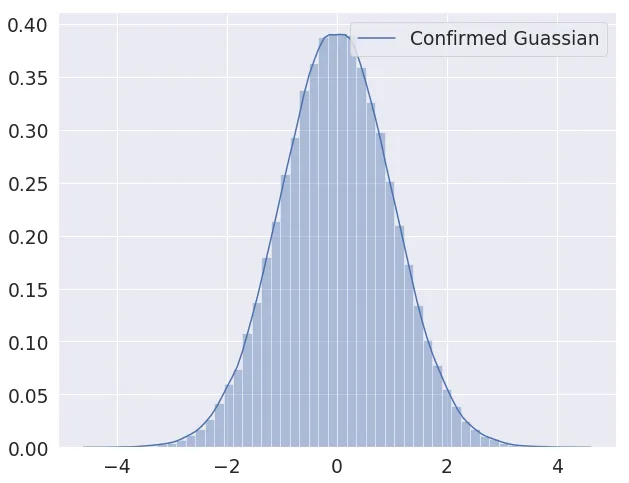

## Multinomial Naive Bayes
* **This classifier uses multinomial distribution and is mostly used for document or text classification problems.** 
* **This classifier predicts the tag of a text such as a piece of email or newspaper article.** 
* **Multinomial distribution is a generalization of Binomial distribution.**

## Bernoulli Naive Bayes
* **This classifier is used when the predictors are boolean in nature and it is assumed they follow Bernoulli distribution.** 
* **Bernoulli distribution is also referred as Discrete Probability distribution which means it only considers discrete random variables.A discrete random variable is one that has a finite or countable number of possible values.**

In [51]:
# CREATING INSTANCES OF GAUSSIAN-NAIVE BAYES,MULTINOMIAL-NAIVE BAYES,BERNOULLI-NAIVE BAYES
gaussian_nb_model = GaussianNB()
multinomial_nb_model = MultinomialNB()
bernoulli_nb_model = BernoulliNB()
svc_model = LinearSVC()

In [52]:
# FITTING THOSE NAIVE BAYES MODELS
gaussian_nb_model.fit(tfidf_vectorized_X_train.toarray(),y_train)
multinomial_nb_model.fit(tfidf_vectorized_X_train.toarray(),y_train)
bernoulli_nb_model.fit(tfidf_vectorized_X_train.toarray(),y_train)
svc_model.fit(tfidf_vectorized_X_train.toarray(),y_train)

LinearSVC()

In [53]:
# GETTING PREDICTIONS OF NAIVE BAYES MODELS ON TEST DATA
gaussian_nb_pred = gaussian_nb_model.predict(tfidf_vectorized_X_test.toarray())
multinomial_nb_pred = multinomial_nb_model.predict(tfidf_vectorized_X_test.toarray())
bernoulli_nb_pred = bernoulli_nb_model.predict(tfidf_vectorized_X_test.toarray())
svc_pred = svc_model.predict(tfidf_vectorized_X_test.toarray())

In [54]:
# GETTING ACCURACY SCORES
print('\033[1m'+'Accuracy Score of Gaussian Naive Bayes is',accuracy_score(y_test,gaussian_nb_pred))
print('\033[1m'+'Accuracy Score of Multinomial Naive Bayes is',accuracy_score(y_test,multinomial_nb_pred))
print('\033[1m'+'Accuracy Score of Bernoulli Naive Bayes is',accuracy_score(y_test,bernoulli_nb_pred))
print('\033[1m'+'Accuracy Score of Support Vector Classifier is',accuracy_score(y_test,svc_pred))

Accuracy Score of Gaussian Naive Bayes is 0.6202749140893471
Accuracy Score of Multinomial Naive Bayes is 0.7852233676975945
Accuracy Score of Bernoulli Naive Bayes is 0.7646048109965635
Accuracy Score of Support Vector Classifier is 0.8556701030927835


In [55]:
# PRINTING CLASSIFICATION REPORTS OF ABOVE DEFINED 4 CLASSIFICATION MODELS
print('\033[1m'+'Gaussian Naive Bayes Classification Report')
print(classification_report(y_test,gaussian_nb_pred))
print(60*'-')
print('\033[1m'+'Multinomial Naive Bayes Classification Report')
print(classification_report(y_test,multinomial_nb_pred))
print(60*'-')
print('\033[1m'+'Bernoulli Naive Bayes Classification Report')
print(classification_report(y_test,bernoulli_nb_pred))
print(60*'-')
print('\033[1m'+'Support Vector Classification Classification Report')
print(classification_report(y_test,svc_pred))

Gaussian Naive Bayes Classification Report
              precision    recall  f1-score   support

         neg       0.67      0.56      0.61       310
         pos       0.58      0.69      0.63       272

    accuracy                           0.62       582
   macro avg       0.63      0.62      0.62       582
weighted avg       0.63      0.62      0.62       582

------------------------------------------------------------
Multinomial Naive Bayes Classification Report
              precision    recall  f1-score   support

         neg       0.88      0.69      0.77       310
         pos       0.72      0.89      0.79       272

    accuracy                           0.79       582
   macro avg       0.80      0.79      0.78       582
weighted avg       0.80      0.79      0.78       582

------------------------------------------------------------
Bernoulli Naive Bayes Classification Report
              precision    recall  f1-score   support

         neg       0.74      0.86   

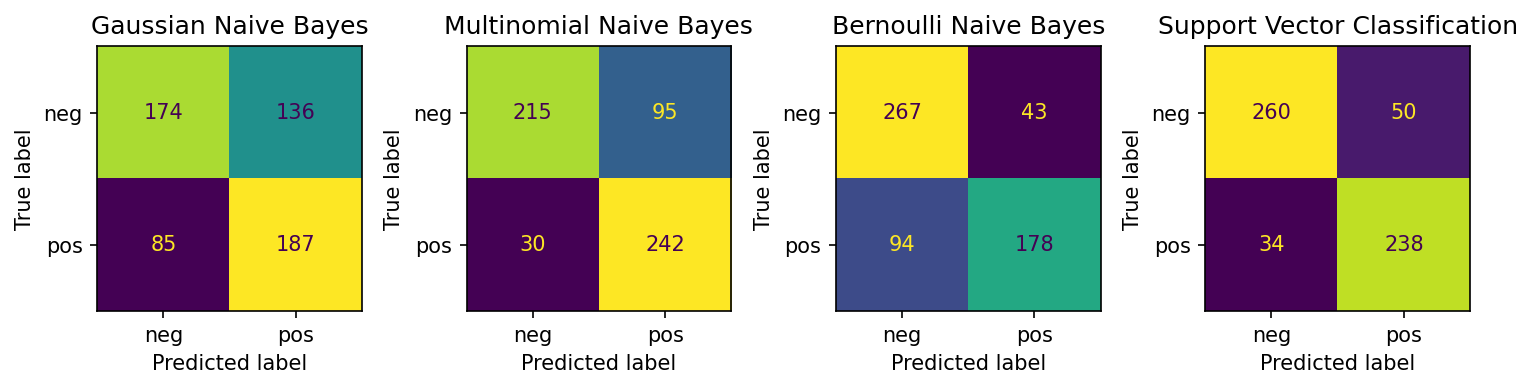

In [71]:
# PLOTTING CONFUSION MATRICES OF THOSE NAIVE BAYES MODELS
fig,axes = plt.subplots(1,4,dpi=150,figsize=(10,5))

# DECLARING CONFUSION MATRICES FOR EACH MODEL
gaussian_nb_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,gaussian_nb_pred),
                                            display_labels=gaussian_nb_model.classes_)

multinomial_nb_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,multinomial_nb_pred),
                                            display_labels=multinomial_nb_model.classes_)

bernoulli_nb_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,bernoulli_nb_pred),
                                            display_labels=bernoulli_nb_model.classes_)

svc_matrix = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,svc_pred),
                                            display_labels=svc_model.classes_)

# PLOTTING THOSE MATRICES IN SUBPLOTS
gaussian_nb_matrix.plot(ax=axes[0])
axes[0].set_title('Gaussian Naive Bayes')
gaussian_nb_matrix.im_.colorbar.remove() # REMOVING COLORBAR

multinomial_nb_matrix.plot(ax=axes[1])
axes[1].set_title('Multinomial Naive Bayes')
multinomial_nb_matrix.im_.colorbar.remove() # REMOVING COLORBAR

bernoulli_nb_matrix.plot(ax=axes[2])
axes[2].set_title('Bernoulli Naive Bayes')
bernoulli_nb_matrix.im_.colorbar.remove() # REMOVING COLORBAR

svc_matrix.plot(ax=axes[3])
axes[3].set_title('Support Vector Classification')
svc_matrix.im_.colorbar.remove() # REMOVING COLORBAR

plt.tight_layout()

### Performing GridSearch for best paramters of SVC Classifier

In [57]:
svc = LinearSVC(random_state=31) # BASIC MODEL
# ASSIGNING PARAMETER GRID FOR SUPPORT VECTOR CLASSIFIER
svc_paramters = {'penalty':['l1','l2'],
                 'loss':['hinge','squared_hinge'],
                 'C':[0.1,1,10,100],
                 'multi_class':['ovr','crammer_singer'],
                 'max_iter':[100,300,500]}
# CREATING GRIDSEARCHCV MODEL WITH SVC
svc_grid_model = GridSearchCV(svc,param_grid=svc_paramters,scoring='accuracy',
                              cv=10,n_jobs=-1)
# FITTING THE GRID SEARCH MODEL
svc_grid_model.fit(tfidf_vectorized_X_train.toarray(),y_train)

GridSearchCV(cv=10, estimator=LinearSVC(random_state=31), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge'],
                         'max_iter': [100, 300, 500],
                         'multi_class': ['ovr', 'crammer_singer'],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [58]:
# GETTING BEST PARAMETERS FOR SVC
svc_grid_model.best_params_

{'C': 1,
 'loss': 'squared_hinge',
 'max_iter': 100,
 'multi_class': 'ovr',
 'penalty': 'l2'}

In [59]:
multinomial_nb = MultinomialNB() # BASIC MULTINOMIAL NAIVE BAYES MODEL
# ASSIGNING PARAMTER GRID FOR MULTINOMIAL NAIVE BAYES
multinomial_nb_parameters = {'alpha':[0.1,0.5,1,10,25,50],
         'force_alpha':[True,False],
         'fit_prior':[True,False]}
# CREATING GRIDSEARCHCV MODEL WITH MULTINOMIAL NAIVE BAYES         
multinomial_grid_model = GridSearchCV(multinomial_nb,param_grid=multinomial_nb_parameters,scoring='accuracy',
                                      cv=10,n_jobs=-1)  
# FITTING THE MODEL
multinomial_grid_model.fit(tfidf_vectorized_X_train.toarray(),y_train)       

GridSearchCV(cv=10, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': [0.1, 0.5, 1, 10, 25, 50],
                         'fit_prior': [True, False],
                         'force_alpha': [True, False]},
             scoring='accuracy')

In [61]:
# GETTING BEST PARAMETRS FOR MULTINOMIAL NAIVE BAYES
multinomial_grid_model.best_params_

{'alpha': 1, 'fit_prior': False, 'force_alpha': True}

## Voting Ensembling
**Using best parameters of SVC and Multinomial Bayes models as a bag of Voting estimators for making prediction.** \
**Making a Pipeline for Tf-idf Vectorization and for Voting Classifier.**


In [64]:
# CREATING A LIST OF ESTIMATORS
estimators = [('Multinomial Naive Bayes',MultinomialNB(alpha=1,fit_prior=False,force_alpha=True)),
              ('SVC',LinearSVC(penalty='l2',loss='squared_hinge',C=1,multi_class='ovr',
                               max_iter=100,random_state=31))]
# ASSIGNING THE PIPELINE WITH STEPS TF-IDF VECTORIZER,VOTING CLASSIFIER
pipeline = Pipeline([
    ('tfidf_vectorizer', TfidfVectorizer()),
    ('voting_classifier', VotingClassifier(estimators=estimators,n_jobs=-1)),
])
# CREATING PARAMETER GRID FOR TF-IDF VECTORIZER AND VOTING CLASSIFIER
parameters = {
    'tfidf_vectorizer__max_df': (0.25, 0.5, 0.75),
    'tfidf_vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'voting_classifier__voting': ['hard','soft']
}
# CREATING AND FITTING THE GRIDSEARCHCV MODEL
final_model = GridSearchCV(pipeline,param_grid=parameters,cv=10,n_jobs=-1,scoring='accuracy')
final_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('tfidf_vectorizer', TfidfVectorizer()),
                                       ('voting_classifier',
                                        VotingClassifier(estimators=[('Multinomial '
                                                                      'Naive '
                                                                      'Bayes',
                                                                      MultinomialNB(alpha=1,
                                                                                    fit_prior=False,
                                                                                    force_alpha=True)),
                                                                     ('SVC',
                                                                      LinearSVC(C=1,
                                                                                max_iter=100,
                                                                                random_state=31))],
                                                         n_jobs=-1))]),
             n_jobs=-1,
             param_grid={'tfidf_vectorizer__max_df': (0.25, 0.5, 0.75),
                         'tfidf_vectorizer__ngram_range': [(1, 1), (1, 2),
                                                           (1, 3)],
                         'voting_classifier__voting': ['hard', 'soft']},
             scoring='accuracy')

In [67]:
# GETTING ACCURACY SCORE OF FINAL MODEL
accuracy_score(y_test,final_model.predict(X_test))

0.8436426116838488